In [2]:
! pip install pandas
! pip install matplotlib
! pip install sklearn
! pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
import pandas as pd
import sklearn.ensemble as skle
import sklearn.svm as svm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold
import sklearn.metrics as sm

In [4]:
df = pd.read_csv('V5_final_dataset.csv', index_col=0).drop_duplicates()

In [20]:
df.columns

Index(['Sex', 'Smoke_status', 'SBE (vein)', 'HCO3- (P, st) (vein)',
       'FCOHb (vein)', 'FHHb (vein)', 'FMetHb (vein)', 'FHbF (vein)',
       'F02Hb (vein)', 'ctBil (vein)', 'pH (vein)', 'pO2 (vein)',
       'pCO2 (vein)', 'ABE (vein)', 'HCO3- (P) (vein)', 'sO2 (vein)',
       'ctHb (vein)', 'Hct (vein)', 'K + (vein)', 'Na + (vein)',
       'Ca2 + ( vein)', 'Cl- (vein)', 'Glu (vein)', 'Lac (vein)',
       'Osmolarity (vein)', 'ctO2 (vein)', 'p50 (vein)', 'Age'],
      dtype='object')

In [5]:
X = df.drop(columns=['Glu (vein)'])
y = df['Glu (vein)']

In [21]:
y_osm = df['Osmolarity (vein)']
X_osm = df.drop(columns=['Osmolarity (vein)'])

In [22]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_osm, y_osm, test_size=0.1, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train_s = preprocessing.normalize(X_train)
X_test_s = preprocessing.normalize(X_test)

In [7]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [10]:
params_grid_RF = {'min_samples_leaf': range(5, 20, 5)
                 }
rand_forest = skle.RandomForestRegressor(random_state=42, n_estimators=1000)
GS_RF = GridSearchCV(rand_forest, params_grid_RF, cv=cv, scoring='neg_mean_squared_error')
GS_RF.fit(X_train, y_train)
rand_forest_GS_y = GS_RF.predict(X_test)

In [11]:
sm.mean_squared_error(y_test, rand_forest_GS_y), sm.r2_score(y_test, rand_forest_GS_y)

(1.5666942611180792, 0.897149904299194)

In [20]:
GS_RF.best_estimator_, GS_RF.best_params_

(RandomForestRegressor(min_samples_leaf=5, n_estimators=1000, random_state=42),
 {'min_samples_leaf': 5})

In [8]:
rand_forest = skle.RandomForestRegressor(min_samples_leaf=5, n_estimators=1000, random_state=42)
rand_forest.fit(X_train, y_train)
rand_forest_GS_y = rand_forest.predict(X_test)

In [23]:
rand_forest_o = skle.RandomForestRegressor(min_samples_leaf=5, n_estimators=1000, random_state=42)
rand_forest_o.fit(X_train_o, y_train_o)
rand_forest_GS_yo = rand_forest_o.predict(X_test_o)

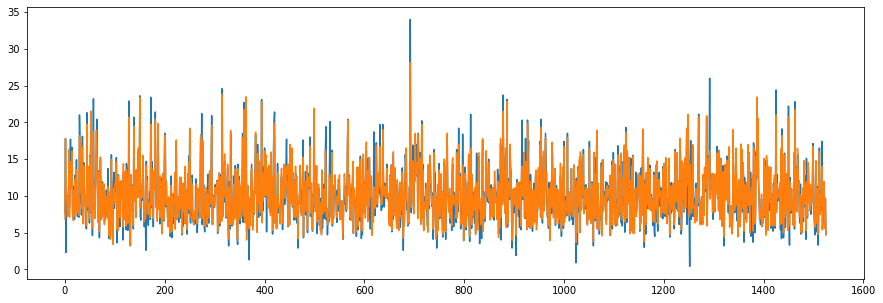

In [13]:
plt.figure(figsize=(15,5)) 
plt.plot(y_test.tolist(), label='Y test')
plt.plot(rand_forest_GS_y, label='RF')

In [9]:
sm.mean_squared_error(y_test, rand_forest_GS_y), sm.r2_score(y_test, rand_forest_GS_y)

(1.5666942611180792, 0.897149904299194)

In [24]:
sm.mean_squared_error(y_test_o, rand_forest_GS_yo), sm.r2_score(y_test_o, rand_forest_GS_yo)

(5.789459412731607e+29, 0.9088616799113018)

In [22]:
features = []
for i in range(len(X_train.columns)):
    features.append((X_train.columns[i], GS_RF.best_estimator_.feature_importances_[i]))

In [23]:
est = skle.RandomForestRegressor(min_samples_leaf=5, n_estimators=1000, random_state=42)
x_train_new = X_train.drop(columns=['Na + (vein)'])
x_test_new = X_test.drop(columns=['Na + (vein)'])
est.fit(x_train_new, y_train)
y_rf = est.predict(x_test_new)
sm.mean_squared_error(y_test, y_rf), sm.r2_score(y_test, y_rf)

(10.008815496190582, 0.34294287201877516)

In [10]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], rand_forest.feature_importances_[i])

Sex 0.0006945548558493545
Smoke_status 0.0005135034655393614
SBE (vein) 0.00018204846436415103
HCO3- (P, st) (vein) 0.0005067989033961447
FCOHb (vein) 0.00027318527680434936
FHHb (vein) 0.0007001447636116569
FMetHb (vein) 0.0007332681623712342
FHbF (vein) 1.3212266734710767e-05
F02Hb (vein) 0.0008514726795716466
ctBil (vein) 0.001072787966698844
pH (vein) 0.0034601715394426634
pO2 (vein) 0.003523568381770744
pCO2 (vein) 0.004092223525892669
ABE (vein) 0.003938180122867697
HCO3- (P) (vein) 0.0034433370360878687
sO2 (vein) 0.003141260882925264
ctHb (vein) 0.005209826458160394
Hct (vein) 0.0027150659102246916
K + (vein) 0.005252525148777249
Na + (vein) 0.38785265282157394
Ca2 + ( vein) 0.004707465978719157
Cl- (vein) 0.006461613696314317
Lac (vein) 0.055550090795623175
Osmolarity (vein) 0.4665488904617782
ctO2 (vein) 0.0292811352062237
p50 (vein) 0.004211046329363127
Age 0.005069968899313743


In [11]:
feat = {}
for i in range(len(X_train.columns)):
    feat[X_train.columns[i]] = rand_forest.feature_importances_[i]
    
sorted( ((k,v) for v,k in feat.items()), reverse=True) 

In [27]:
feat_o = {}
for i in range(len(X_train_o.columns)):
    feat_o[X_train_o.columns[i]] = rand_forest_o.feature_importances_[i]
    
sorted( ((k,v) for v,k in feat_o.items()), reverse=True) 

[(0.2937144618737344, 'Na + (vein)'),
 (0.1682693156552873, 'ctHb (vein)'),
 (0.1636842998644771, 'Cl- (vein)'),
 (0.1238185199466835, 'pCO2 (vein)'),
 (0.09489978380843006, 'sO2 (vein)'),
 (0.0649838517448426, 'pO2 (vein)'),
 (0.04962519728578215, 'HCO3- (P) (vein)'),
 (0.00868570216823575, 'Glu (vein)'),
 (0.008171024226957027, 'Ca2 + ( vein)'),
 (0.00615416507601264, 'Hct (vein)'),
 (0.005453082027025582, 'ctO2 (vein)'),
 (0.0032955542086731257, 'p50 (vein)'),
 (0.002611400977753125, 'Lac (vein)'),
 (0.0021968507112788364, 'K + (vein)'),
 (0.002109695999455312, 'ABE (vein)'),
 (0.001401720401154761, 'Age'),
 (0.0008344242274702661, 'pH (vein)'),
 (4.76968140947037e-05, 'Smoke_status'),
 (4.3252982651749635e-05, 'Sex'),
 (1.023050053251798e-31, 'HCO3- (P, st) (vein)'),
 (9.381983561253922e-32, 'SBE (vein)'),
 (2.6066603775536504e-32, 'FMetHb (vein)'),
 (8.421487671245865e-33, 'ctBil (vein)'),
 (5.430801903248854e-34, 'F02Hb (vein)'),
 (3.0811290138919314e-34, 'FHHb (vein)'),
 (1.9975